In [81]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="white")
import os
import plotly.express as px
from plotly.subplots import make_subplots
from plotly import graph_objects as go
import warnings
warnings.filterwarnings("ignore")

In [82]:
original_dfs = []

In [83]:
original_dfs = []
files = ['uncertainty_0_0_0_0_0_0_0_0_0.025',
'uncertainty_0_0_0_0_0_0_0_0_0.05',
'uncertainty_0_0_0_0_0_0_0_0_0.075',
'uncertainty_0_0_0_0_0_0_0_0_0.125',
'uncertainty_0_0_0_0_0_0_0_0_0.15',
'uncertainty_0_0_0_0_0_0_0_0_0.175',
'uncertainty_0_0_0_0_0_0_0_0_0.1',
'uncertainty_0_0_0_0_0_0_0_0_0.225',
'uncertainty_0_0_0_0_0_0_0_0_0.25',
'uncertainty_0_0_0_0_0_0_0_0_0.2',
'uncertainty_0_0_0_0_0_0_0_0_0',
'uncertainty_0_0_0_0_0_0_-0.01_0.01_0',
'uncertainty_0_0_0_0_0_0_-0.02_0.02_0',
'uncertainty_0_0_0_0_0_0_-0.03_0.03_0',
'uncertainty_0_0_0_0_0_0_-0.04_0.04_0',
"uncertainty_0_0_0_0_0_0_-0.05_0.05_0",
"uncertainty_0_0_0_0_0_0_-0.1_0.1_0",
"uncertainty_0_0_0_0_-0.01_0.01_0_0_0",
"uncertainty_0_0_0_0_-0.01_0.01_-0.01_0.01_0",
"uncertainty_0_0_0_0_-0.02_0.02_0_0_0",
'uncertainty_0_0_0_0_-0.02_0.02_-0.02_0.02_0',
'uncertainty_0_0_0_0_-0.03_0.03_0_0_0',
'uncertainty_0_0_0_0_-0.03_0.03_-0.03_0.03_0',
'uncertainty_0_0_0_0_-0.04_0.04_0_0_0',
'uncertainty_0_0_0_0_-0.04_0.04_-0.04_0.04_0',
'uncertainty_0_0_0_0_-0.05_0.05_0_0_0',
'uncertainty_0_0_0_0_-0.05_0.05_-0.05_0.05_0']
#'uncertainty_0_0_0_0_-0.1_0.1_0_0_0']

for st in files:
    vals = st.split("_")[1:]
    df = pd.read_csv(st+".csv",header=None)
    df =df.rename(columns={0:'safety_percentage',1:'area'})
#     df["xd_l"] = float(vals[0])
#     df["xd_u"] = float(vals[1])
#     df["yd_l"] = float(vals[2])
#     df["yd_u"] = float(vals[3])
    df["vd_l"] = float(vals[4])
    df["vd_u"] = float(vals[5])
    df["thd_l"] = float(vals[6])
    df["thd_u"] = float(vals[7])
    df["parameter_uncertainty"] = float(vals[8])
    
    original_dfs.append(df)
        
dfs = pd.concat(original_dfs)

In [84]:
no_uncertainty = dfs[(dfs['vd_u']==0) & (dfs['thd_u']==0) & (dfs['parameter_uncertainty']==0)]
no_uncertainty ['percent_change_in_size_of_reachset'] = 0.0
no_uncertainty 

,safety_percentage,area,vd_l,vd_u,thd_l,thd_u,parameter_uncertainty,percent_change_in_size_of_reachset
0,0.982892,561.135,0.0,0.0,0.0,0.0,0.0,0.0


In [85]:
param_uncertainty = dfs[dfs['parameter_uncertainty']>0]
param_uncertainty = pd.concat([no_uncertainty,param_uncertainty]).sort_values(by="area")
param_uncertainty['percent_change_in_size_of_reachset'] = round((param_uncertainty['area'] - param_uncertainty.iloc[0]['area'])/param_uncertainty.iloc[0]['area'] * 100,2)
param_uncertainty

,safety_percentage,area,vd_l,vd_u,thd_l,thd_u,parameter_uncertainty,percent_change_in_size_of_reachset
0,0.982892,561.135,0.0,0.0,0.0,0.0,0.000,0.00
0,0.882418,9541.070,0.0,0.0,0.0,0.0,0.025,1600.32
0,0.836576,27950.600,0.0,0.0,0.0,0.0,0.050,4881.08
0,0.647026,74767.400,0.0,0.0,0.0,0.0,0.075,13224.32
0,0.528071,136073.000,0.0,0.0,0.0,0.0,0.100,24149.60
0,0.330377,204209.000,0.0,0.0,0.0,0.0,0.125,36292.13
0,0.252078,378668.000,0.0,0.0,0.0,0.0,0.150,67382.51
0,0.220311,446924.000,0.0,0.0,0.0,0.0,0.175,79546.43
0,0.213571,642609.000,0.0,0.0,0.0,0.0,0.200,114419.50
0,0.209829,911761.000,0.0,0.0,0.0,0.0,0.225,162385.14


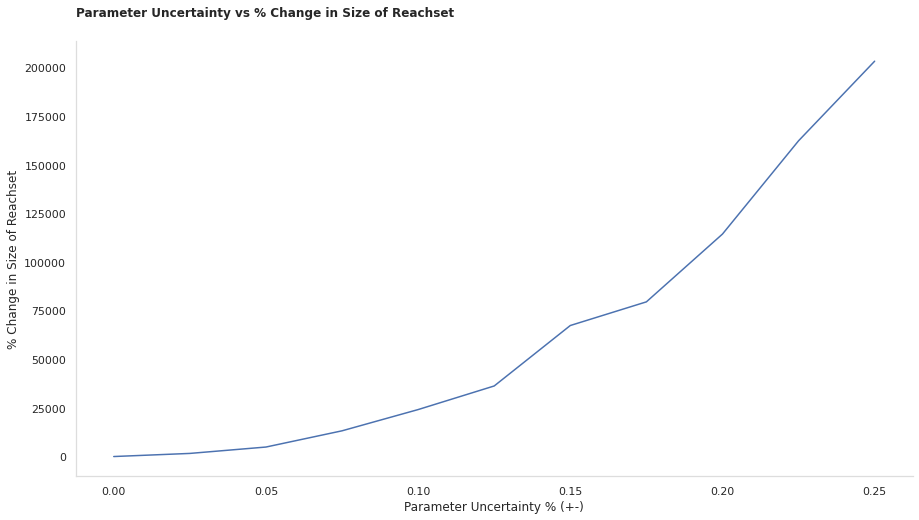

In [86]:
plt.figure(figsize=(15,8))
ax = sns.lineplot(data=param_uncertainty, x="parameter_uncertainty",y='percent_change_in_size_of_reachset')
ax.spines['bottom'].set_color('#dddddd')
ax.spines['left'].set_color('#dddddd')
sns.despine(left=False, bottom=False, right=True)
#_= plt.legend(loc='upper left',frameon=False)

_= plt.ylabel("% Change in Size of Reachset")
_= plt.xlabel('Parameter Uncertainty % (+-)')
_= plt.title("Parameter Uncertainty vs % Change in Size of Reachset",loc='left',pad=25.0,fontweight="bold")

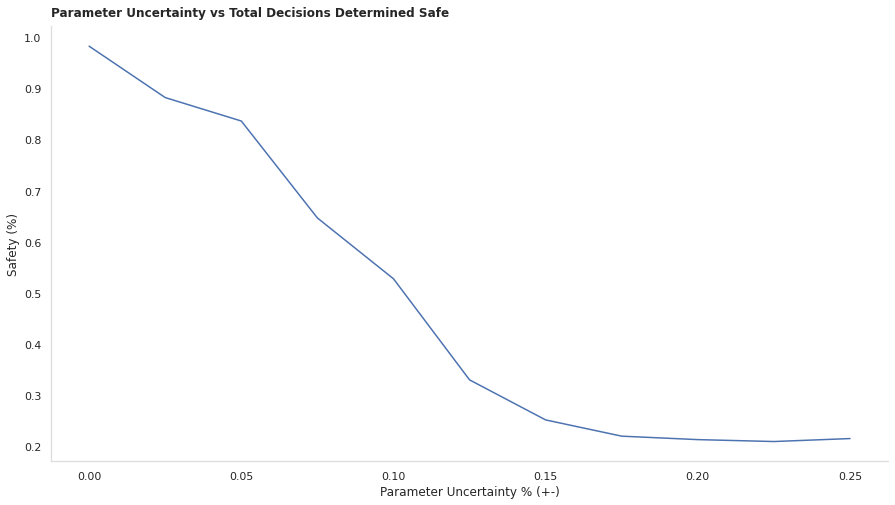

In [87]:
plt.figure(figsize=(15,8))
ax = sns.lineplot(data=param_uncertainty, x="parameter_uncertainty",y="safety_percentage")
ax.spines['bottom'].set_color('#dddddd')
ax.spines['left'].set_color('#dddddd')
sns.despine(left=False, bottom=False, right=True)
#_= plt.legend(loc='best',frameon=False)

_= plt.ylabel("Safety (%)")
_= plt.xlabel('Parameter Uncertainty % (+-)')
_= plt.title("Parameter Uncertainty vs Total Decisions Determined Safe",loc='left',pad=10.0,fontweight="bold")

In [88]:
disturbances = dfs[dfs['parameter_uncertainty']==0.0].sort_values(by="area")
disturbances['percent_change_in_size_of_reachset'] = round((disturbances['area'] - disturbances.iloc[0]['area'])/disturbances.iloc[0]['area'] * 100,2)
disturbances

,safety_percentage,area,vd_l,vd_u,thd_l,thd_u,parameter_uncertainty,percent_change_in_size_of_reachset
0,0.982892,561.135,0.00,0.00,0.00,0.00,0.0,0.00
0,0.837029,8740.550,0.00,0.00,-0.01,0.01,0.0,1457.66
0,0.564641,43707.800,0.00,0.00,-0.02,0.02,0.0,7689.18
0,0.606704,50479.700,0.00,0.00,-0.03,0.03,0.0,8896.00
0,0.621667,68515.800,-0.01,0.01,0.00,0.00,0.0,12110.22
0,0.537778,94453.800,0.00,0.00,-0.04,0.04,0.0,16732.63
0,0.447471,139858.000,-0.01,0.01,-0.01,0.01,0.0,24824.13
0,0.481687,208065.000,-0.02,0.02,0.00,0.00,0.0,36979.31
0,0.224750,456824.000,-0.03,0.03,0.00,0.00,0.0,81310.71
0,0.249721,511599.000,-0.02,0.02,-0.02,0.02,0.0,91072.18


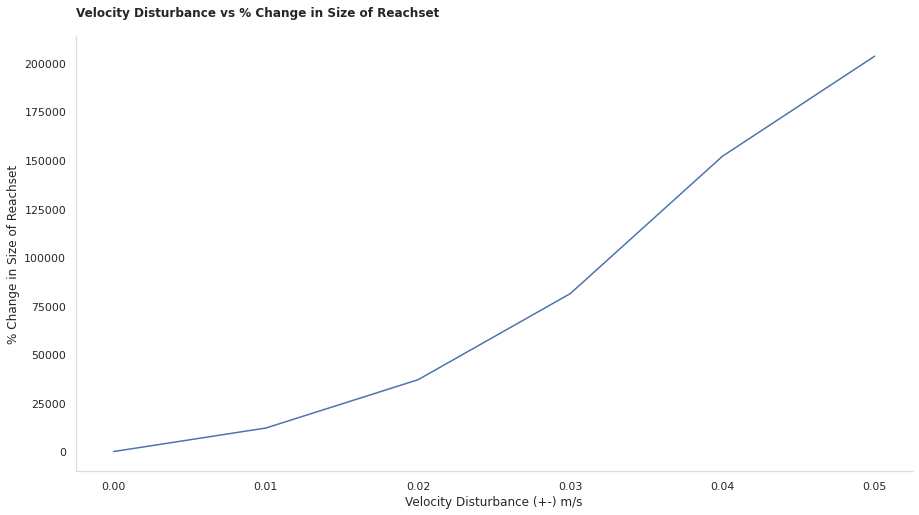

In [89]:
vd = disturbances[(disturbances['vd_u']>0) & (disturbances['thd_u']==0.0)].sort_values(by="area")
vd = pd.concat([no_uncertainty,vd])
plt.figure(figsize=(15,8))
ax = sns.lineplot(data=vd, x="vd_u",y="percent_change_in_size_of_reachset")
ax.spines['bottom'].set_color('#dddddd')
ax.spines['left'].set_color('#dddddd')
sns.despine(left=False, bottom=False, right=True)
#_= plt.legend(loc='upper left',frameon=False)

_= plt.ylabel("% Change in Size of Reachset")
_= plt.xlabel('Velocity Disturbance (+-) m/s')
_= plt.title("Velocity Disturbance vs % Change in Size of Reachset",loc='left',pad=20.0,fontweight="bold")

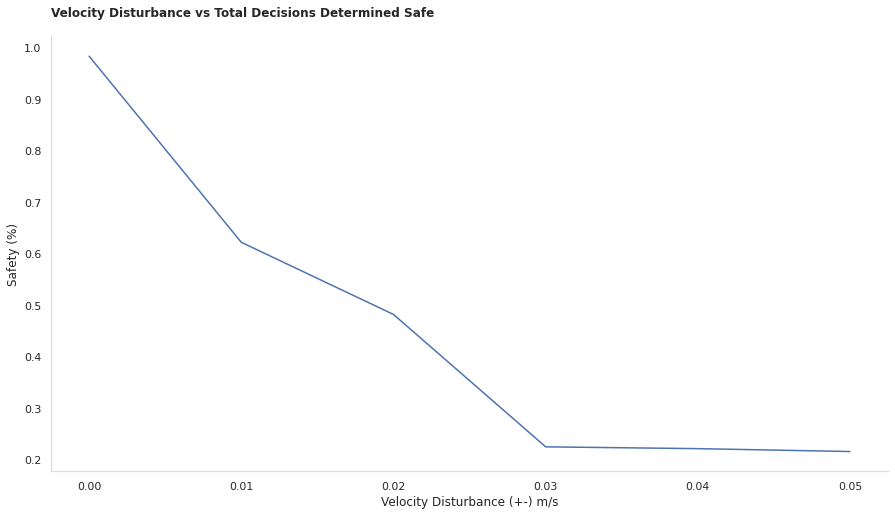

In [90]:
vd = disturbances[(disturbances['vd_u']>0) & (disturbances['thd_u']==0.0)].sort_values(by="area")
vd = pd.concat([no_uncertainty,vd])
plt.figure(figsize=(15,8))
ax = sns.lineplot(data=vd, x="vd_u",y="safety_percentage")
ax.spines['bottom'].set_color('#dddddd')
ax.spines['left'].set_color('#dddddd')
sns.despine(left=False, bottom=False, right=True)
#_= plt.legend(loc='upper left',frameon=False)

_= plt.ylabel("Safety (%)")
_= plt.xlabel('Velocity Disturbance (+-) m/s')
_= plt.title("Velocity Disturbance vs Total Decisions Determined Safe",loc='left',pad=20.0,fontweight="bold")

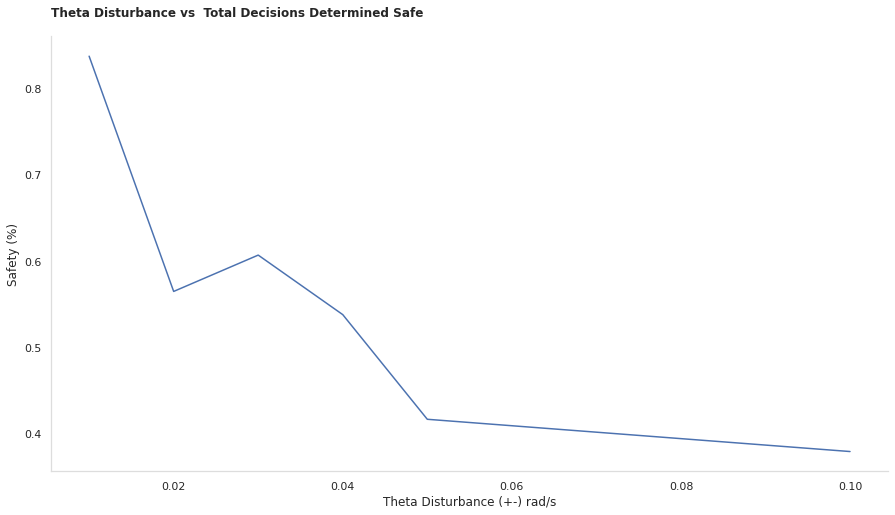

In [91]:
thd = disturbances[(disturbances['thd_u']>0) & (disturbances['vd_u']==0.0)].sort_values(by="area")
plt.figure(figsize=(15,8))
ax = sns.lineplot(data=thd, x="thd_u",y="safety_percentage")
ax.spines['bottom'].set_color('#dddddd')
ax.spines['left'].set_color('#dddddd')
sns.despine(left=False, bottom=False, right=True)
#_= plt.legend(loc='upper left',frameon=False)

_= plt.ylabel("Safety (%)")
_= plt.xlabel('Theta Disturbance (+-) rad/s')
_= plt.title("Theta Disturbance vs  Total Decisions Determined Safe",loc='left',pad=20.0,fontweight="bold")

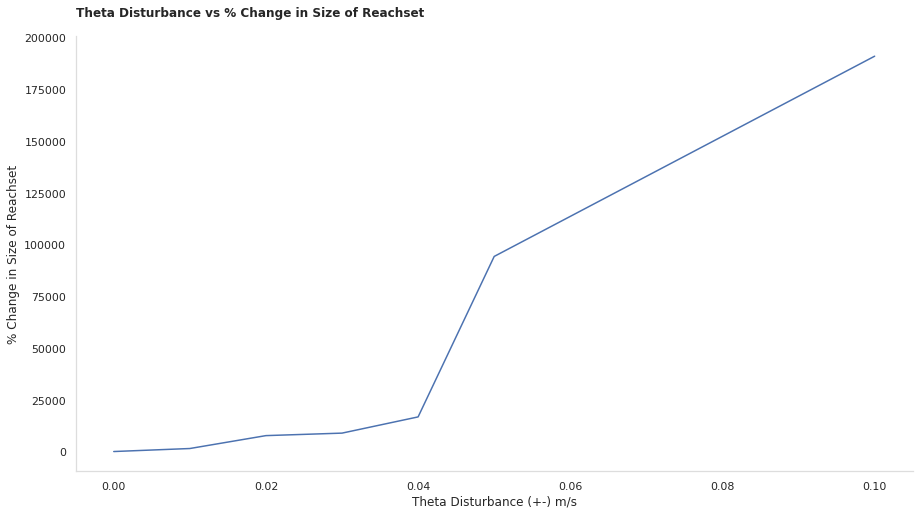

In [92]:
thd = disturbances[(disturbances['thd_u']>0) & (disturbances['vd_u']==0.0)].sort_values(by="area")
thd = pd.concat([no_uncertainty,thd])
plt.figure(figsize=(15,8))
ax = sns.lineplot(data=thd, x="thd_u",y="percent_change_in_size_of_reachset")
ax.spines['bottom'].set_color('#dddddd')
ax.spines['left'].set_color('#dddddd')
sns.despine(left=False, bottom=False, right=True)
#_= plt.legend(loc='upper left',frameon=False)

_= plt.ylabel("% Change in Size of Reachset")
_= plt.xlabel('Theta Disturbance (+-) m/s')
_= plt.title("Theta Disturbance vs % Change in Size of Reachset",loc='left',pad=20.0,fontweight="bold")

In [93]:
disturbances = dfs[dfs['parameter_uncertainty']==0.0].sort_values(by="area")
covary = disturbances[(abs(disturbances['vd_u'])>0) & (abs(disturbances['thd_u'])>0)]
no_uncertainty = disturbances[(disturbances['vd_u']==0) & (disturbances['thd_u']==0)]
covary = pd.concat([covary,no_uncertainty]).sort_values(by="area")
covary['percent_change_in_size_of_reachset'] = round((covary['area'] - covary.iloc[0]['area'])/covary.iloc[0]['area'] * 100,2)
covary

,safety_percentage,area,vd_l,vd_u,thd_l,thd_u,parameter_uncertainty,percent_change_in_size_of_reachset
0,0.982892,561.135,0.00,0.00,0.00,0.00,0.0,0.00
0,0.447471,139858.000,-0.01,0.01,-0.01,0.01,0.0,24824.13
0,0.249721,511599.000,-0.02,0.02,-0.02,0.02,0.0,91072.18
0,0.219621,1044830.000,-0.03,0.03,-0.03,0.03,0.0,186099.40
0,0.210994,1360100.000,-0.05,0.05,-0.05,0.05,0.0,242283.74
0,0.214881,1410290.000,-0.04,0.04,-0.04,0.04,0.0,251228.11


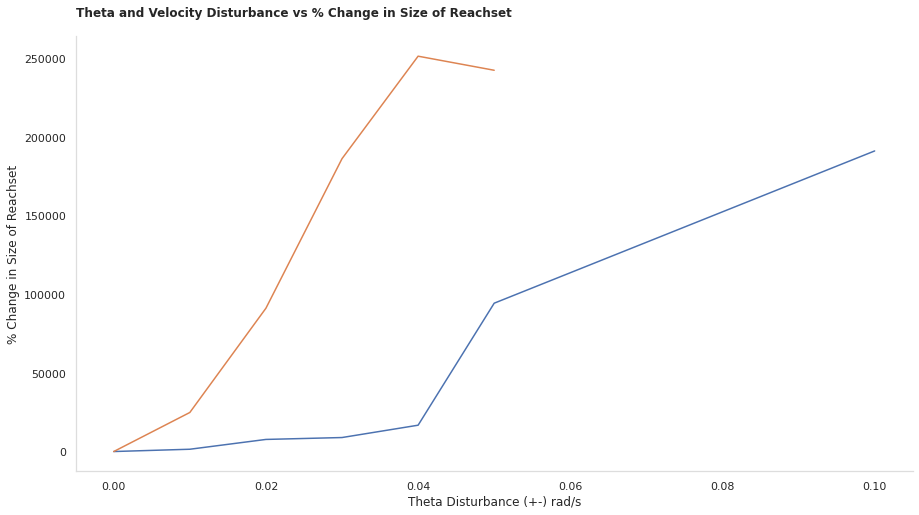

In [94]:
plt.figure(figsize=(15,8))
ax = sns.lineplot(data=thd, x="thd_u",y="percent_change_in_size_of_reachset")
ax = sns.lineplot(data=covary, x="thd_u",y="percent_change_in_size_of_reachset")
ax.spines['bottom'].set_color('#dddddd')
ax.spines['left'].set_color('#dddddd')
sns.despine(left=False, bottom=False, right=True)
#_= plt.legend(loc='upper left',frameon=False)

_= plt.ylabel("% Change in Size of Reachset")
_= plt.xlabel('Theta Disturbance (+-) rad/s')
_= plt.title("Theta and Velocity Disturbance vs % Change in Size of Reachset",loc='left',pad=20.0,fontweight="bold")

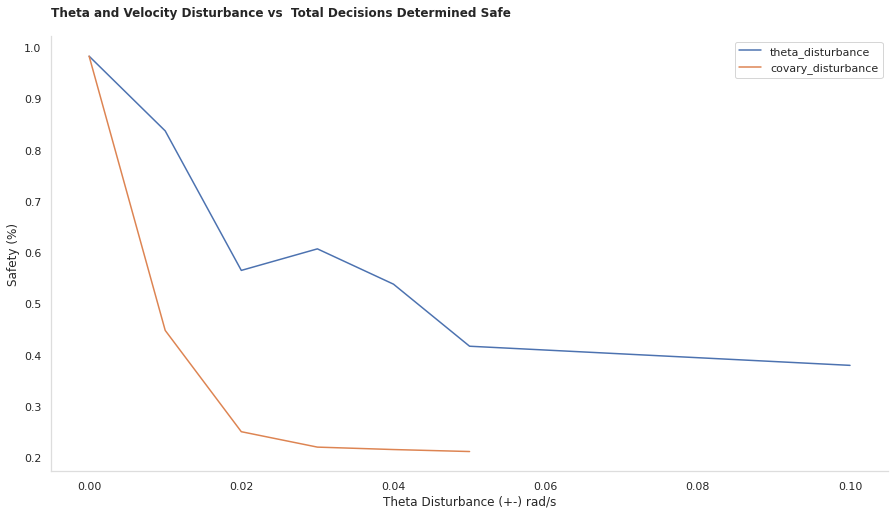

In [95]:
plt.figure(figsize=(15,8))
ax = sns.lineplot(data=thd, x="thd_u",y="safety_percentage",label="theta_disturbance")
ax = sns.lineplot(data=covary, x="thd_u",y="safety_percentage",label="covary_disturbance")
ax.spines['bottom'].set_color('#dddddd')
ax.spines['left'].set_color('#dddddd')
sns.despine(left=False, bottom=False, right=True)
#_= plt.legend(loc='upper left',frameon=False)

_= plt.ylabel("Safety (%)")
_= plt.xlabel('Theta Disturbance (+-) rad/s')
_= plt.title("Theta and Velocity Disturbance vs  Total Decisions Determined Safe",loc='left',pad=20.0,fontweight="bold")